Назва дисципліни: Обробка та аналіз біомедичних даних

Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №8

Тема: Дисперсійний аналіз

Завдання:

1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп)

In [3]:
#Імпортування бібліотек
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt

Дослід закладався в 6-х повторностях з градаціями регульованого фактору (розпушування) – відсутність, два, чотири, шість. Всього закладено 24 пробних площ, на яких у дослідних рослин заміряні восени річні прирости за висотою. Результати замірів згруповані в таблиці нижче. Однакова кількість повторностей по всіх варіантах досліду і участь лише одного регульованого фактора підтверджує класифікацію комплексу як однофакторіального і рівномірного

In [4]:
#Таблиця 1
data_0 = [6,4,8,6,12,10]
data_2 = [8,8,12,12,16,16]
data_4 = [12,14,16,18,20,22]
data_6 = [12,12,12,16,16,16]

#Середнє значення(заокруглюємо до 2 знаків після коми)
av_0 = float('{:.2f}'.format(sum(data_0)/len(data_0))) 
av_2 = float('{:.2f}'.format(sum(data_2)/len(data_0))) 
av_4 = float('{:.2f}'.format(sum(data_4)/len(data_0))) 
av_6 = float('{:.2f}'.format(sum(data_6)/len(data_0)))
#Сандартні відхилення для кожної з груп (заокруглюємо до 2 знаків після коми)
#std() - обчислює середньоквадратичне (стандартне) відхилення елементів масива
std_0 = float('{:.2f}'.format(np.std(data_0))) 
std_2 = float('{:.2f}'.format(np.std(data_2))) 
std_4 = float('{:.2f}'.format(np.std(data_4))) 
std_6 = float('{:.2f}'.format(np.std(data_6)))

#Таблиця з даними про Середні значення і про Стандартні відхилення
table_1 = pd.DataFrame({'Нуль':data_0,
                        'Два':data_2,
                        'Чотири':data_4,
                        'Шість':data_6},
                        index=np.arange(1, len(data_0) + 1))
table_1.columns.name = 'n'

#Таблиця для побудови boxplot діаграми і розрахунків
table_only_data = pd.DataFrame({'Нуль':data_0,
                        'Два':data_2,
                        'Чотири':data_4,
                        'Шість':data_6})

table_1.loc["Середні значення:"] = [av_0, av_2, av_4, av_6]
table_1.loc["Стандартне відхилення:"] = [std_0, std_2, std_4, std_6]

table_1

n,Нуль,Два,Чотири,Шість
1,6.00,8.00,12.00,12.0
2,4.00,8.00,14.00,12.0
3,8.00,12.00,16.00,12.0
4,6.00,12.00,18.00,16.0
5,12.00,16.00,20.00,16.0
6,10.00,16.00,22.00,16.0
Середні значення:,7.67,12.00,17.00,14.0
Стандартне відхилення:,2.69,3.27,3.42,2.0


2. Побудувати графік розкиду в групах

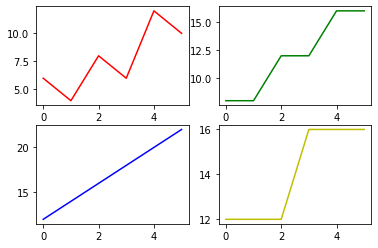

In [5]:
#1 графік
plt.subplot(2, 2, 1) 
plt.plot(data_0, 'r')
#2 графік
plt.subplot(2, 2, 2) 
plt.plot(data_2, 'g')
#3 графік
plt.subplot(2, 2, 3) 
plt.plot(data_4, 'b')
#4 графік
plt.subplot(2, 2, 4) 
plt.plot(data_6, 'y')

[Text(0, 0.5, 'Наявнсть розпушування'), Text(0.5, 0, 'Річний приріст')]

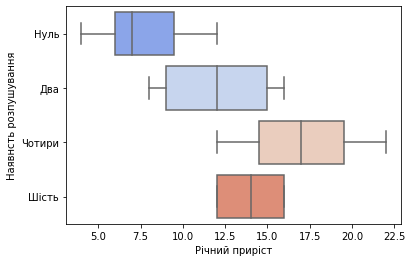

In [6]:
#Для кращої візуалізації розкиду в групах

#Діаграма розмаху, коро́бковий графік, графік «ящик з вусами» — засіб візуалізації в описовій статистиці груп числових даних 
#через їх квантилі. Коробковий графік може також мати лінії, які виходять вертикально з коробки (вони називаються вусами), 
#вони вказують величину мінливості поза верхньою та нижньою межами квантиля. Викиди може бути нанесено у вигляді точок.

sns.boxplot( data = table_only_data, orient='h', palette='coolwarm').set(xlabel='Річний приріст', 
                                                        ylabel='Наявнсть розпушування')

3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз

In [7]:
def Duspersion(table):
    #Розраховуємо загальні дані
    c = (len(table.iloc[0,:])) #кількість умов (градацій)
    n = (len(table.iloc[:,0])) #кількість досліджень в групах
    N = c*n #загальна кількість досліджень
    Tc_2 = sum_x = sum_x_2 = x_2_sum = const = 0
    result_F = ""
    
    #Сума квадратів сумарних значень по кожній групі    
    for i in range (c):
        Tc_2 += (sum(table.iloc[:,i]))**2 
    
    #Квадрат індивідуальної суми загальних значень
    for i in range(c):
        for j in range(n):
            sum_x += (table.iloc[j,i])
    sum_x_2 = sum_x **2
    
    #Сума квадратів індивідуальних значень
    for i in range(c):
        for j in range(n):
            x_2_sum += (table.iloc[j,i])**2
    
    #Константа, яку потрібно відняти від кожної суми квадратів (заогруглюємо до 1 знака після коми)
    const = float('{:.1f}'.format(sum_x_2 / N))
    
    SS_fact = SS_zag = SS_vup = d_fact = d_zag = d_vup = MS_fact = MS_vup = 0
    
    #Крок 1 (Розрахуваємо внутрішньогрупову дисперсію SS_fact)
    SS_fact = float('{:.2f}'.format((Tc_2 / n) - const))
    
    #Крок 2 (Розрахувуємо загальногрупову дисперсію SS_zag)
    SS_zag = float('{:.2f}'.format((x_2_sum - const)))
    
    #Крок 3 (Розраховуємо випадкову (залишкову) величину SS_vup)
    SS_vup = float('{:.2f}'.format((SS_zag - SS_fact)))
    
    #Крок 4 (Визначаємо кількість ступенів свободи)
    d_fact = c - 1
    d_zag = N - 1
    d_vup = d_zag - d_fact
    
    #Крок 5 (Розділяємо кожну SS на відповідне число ступенів свободи)
    MS_fact = float('{:.2f}'.format(SS_fact / d_fact))
    MS_vup = float('{:.2f}'.format(SS_vup / d_vup))
    
    #Крок 6 (Розрахувeємо значення F_emp)
    F_emp = float('{:.2f}'.format(MS_fact / MS_vup))
    
    #Крок 7 (Визначити критичне значення F_tab по таблиці критичних значень)
    
    #Робота з файлом
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('Fishera.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    
    #Отримуємо значення необхідної нам ячейки (номер рядка)[номер стовпчика]
    if(d_fact <= 30 and d_vup <= 120):
        F_tabl = sheet.row_values(d_vup + 1)[d_fact]
        
    #Крайні випадки    
    if(d_fact <= 30 and d_vup > 120 and d_vup < 130):
        F_tabl = sheet.row_values(32)[d_fact]
    if(d_fact > 30 and d_fact < 40 and d_vup <= 120):
        F_tabl = sheet.row_values(d_vup + 1)[14]
    if(d_fact > 30 and d_fact < 40 and d_vup > 120 and d_vup < 130):
        F_tabl = sheet.row_values(32)[14]    
    if(d_fact > 40 and d_vup > 130): #Неможливо визначити F_tabl по цій таблиці 
        F_tabl = 0
        
    #Крок 8 (Співставити F_emp та критичне значення F_tabl)
    if(F_emp >= F_tabl):
        result_F ="Відхиляється"
    else:
        result_F ="Приймається"
    
    #Результати оформлені за допомогою таблиці
    result_num = [SS_fact, SS_zag, SS_vup, d_fact, d_zag, d_vup, MS_fact, MS_vup, F_emp, F_tabl, result_F]
    table_2 = pd.DataFrame({'Характеристика даних':["Внутрішньогрупова дисперсія:SS_факт",
                                                    "Загальногрупова дисперсія:SS_заг",
                                                    "Випадкова (залишкова)величина : SS_вип",
                                                    "Кількість ступенів свободи: d_факт",
                                                    "Кількість ступенів свободи: d_заг",
                                                    "Кількість ступенів свободи: d_вип",
                                                    "MS_факт",
                                                    "MS_вип",
                                                    "Значення: F_емпір",
                                                    "Критичне значення: F_крит",
                                                    "Результат H_0:"],
                            'Результати обчислень': result_num},
                             index=np.arange(1, len(result_num) + 1))
    
    table_2.columns.name = '№'
    return table_2

4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці

In [8]:
Duspersion(table_only_data)

№,Характеристика даних,Результати обчислень
1,Внутрішньогрупова дисперсія:SS_факт,275.97
2,Загальногрупова дисперсія:SS_заг,477.3
3,Випадкова (залишкова)величина : SS_вип,201.33
4,Кількість ступенів свободи: d_факт,3
5,Кількість ступенів свободи: d_заг,23
6,Кількість ступенів свободи: d_вип,20
7,MS_факт,91.99
8,MS_вип,10.07
9,Значення: F_емпір,9.14
10,Критичне значення: F_крит,3.1


Висновок:

Під час дисперсійного аналізу був отриманий результат  𝐹_емпір  >  𝐹_крит , що свідчить про те що нульову гіпотезу про рівність середніх ми відхиляємо і приймаємо альтернативну: середні незалежних груп - відмінні. Що в нашому прикладі свідчить про те, що розпушування грунту впливає на річний приріст рослин.